In [4]:
import numpy as np
import importlib
import matplotlib.pyplot as plt

import representation
import kex_data
import kex_headers
import listmode
import petlink
import position

In [5]:
# test if copy to representation from kex_headers worked
mi_rm, mi_seg = kex_headers.get_mi_maps()

In [6]:
print(kex_headers.SEGMENT_TABLE)
num_sino = np.sum(kex_headers.SEGMENT_TABLE)
print(num_sino)
#print(np.empty(num_sino, dtype=int))
rm2, seg2 = representation.get_mi_maps(seg_tab=kex_headers.SEGMENT_TABLE)

[109  97  97  75  75  53  53  31  31]
621


In [7]:
error_count = 0
if np.sum(rm2-mi_rm) != 0:
    error_count += 0
if np.sum(mi_seg-seg2) != 0:
    error_count += 0

if error_count > 0:
    print("error count", error_count)
else: 
    print("test passed")

test passed


In [8]:
representation.get_offset_map(14)

array([ 0,  1, -1,  2, -2,  3, -3,  4, -4,  5, -5,  6, -6,  7],
      dtype=int32)

In [9]:
A = [[1,2]]
print(np.array(A + A + A +[]))

[[1 2]
 [1 2]
 [1 2]]


In [25]:
importlib.reload(representation)
toflor = np.array([2, 109, 20, 70])
sino_shape = kex_headers.HISTOGRAM_SHAPE
seg_tab = kex_headers.SEGMENT_TABLE
toflor2 = representation.untangle_mi(lorbins=toflor, seg_tab=seg_tab, tof=True)
print(toflor2)

[ 2  6  1 20 70]


In [26]:
toflor3 = representation.get_natural_toflor_units(toflor, kex_headers.SCAN_DICT)
print(toflor3)

{'rm': 12.162, 'rd': 44.594, 'tx': 0.39269908169872414, 'ro': -244.16842431661323, 'tof': -81.974500234375}


In [27]:
-1 // 2

-1

In [28]:
importlib.reload(representation);

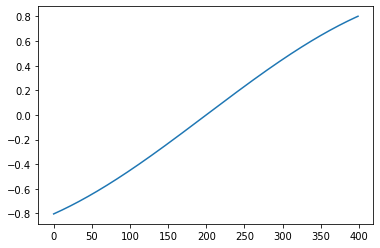

In [37]:
plt.plot(representation.arc_radial_offset(400, kex_headers.SCAN_DICT['ro rad'], 1))

In [38]:
importlib.reload(representation)

<module 'representation' from 'C:\\Users\\petct\\Desktop\\Hugo\\Code\\PythonMEX\\representation.py'>

In [39]:
lm_dataset, lm_paths = kex_data.listmode()

In [40]:
test_lm = lm_dataset[-1][:100000]

In [41]:
arc_dict = listmode.get_fov_image_bins(test_lm, arc=True)
narc_dict = listmode.get_fov_image_bins(test_lm, arc=False)

In [94]:
dictionaries = [arc_dict, narc_dict]

for d in dictionaries:
    print("com", np.mean(d['fov_image_bins'], axis=1))

com [ 47.54650084 112.69368836  98.56057267]
com [ 47.9043544  136.49691146  98.98887232]


In [95]:
recons, rpaths = kex_data.reconstructions()

In [96]:
rcom = []
for r in recons:
    c = position.center_of_mass(r)
    print("com", c)
    rcom.append(c)

com (54.54506671013993, 99.88068266317335, 100.24432682118665)
com (54.481116045841475, 109.80538882233014, 100.19990990583808)
com (47.5012789338229, 120.45245851191282, 99.0732076186318)
com (47.53629536274702, 137.43006472480766, 99.00728627556309)


In [97]:
shape = kex_headers.IMAGE_SHAPE

histos = []
for d in dictionaries:
    histos.append(listmode.get_histogram(d['fov_image_bins'], shape=shape))
for h in histos:
    print("com", position.center_of_mass(h))

com (47.11254839339667, 112.19156317851275, 98.06455133433663)
com (47.46944867688672, 135.99636182717126, 98.48881080464774)


In [98]:
print(dictionaries[0].keys())

dict_keys(['is_event', 'events', 'tof_lor', 'is_prompt', 'prompts', 'prompt_image_bins', 'is_image_fov', 'fov_image_bins'])


In [99]:
print("R", R, "\nS", S, "\nT", T)

NameError: name 'R' is not defined

tofo [-5  1 -4 ...  4  2  3]
tofbin_s 3.125e-10
tof_offset_s 3.90625e-11
lightspeed 299792458000.0


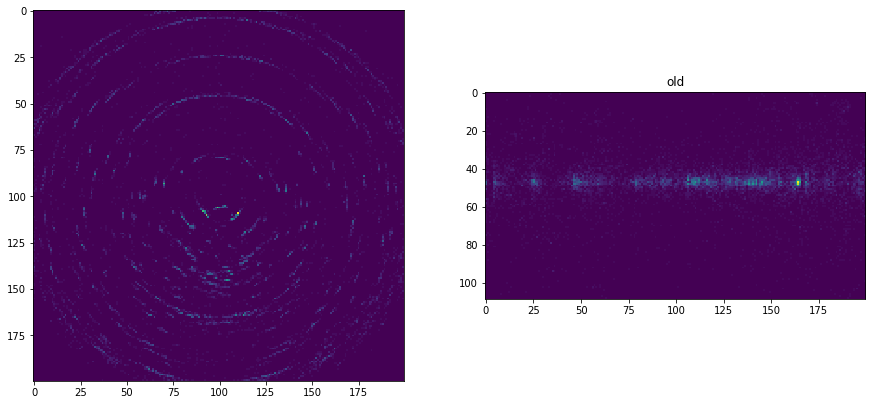

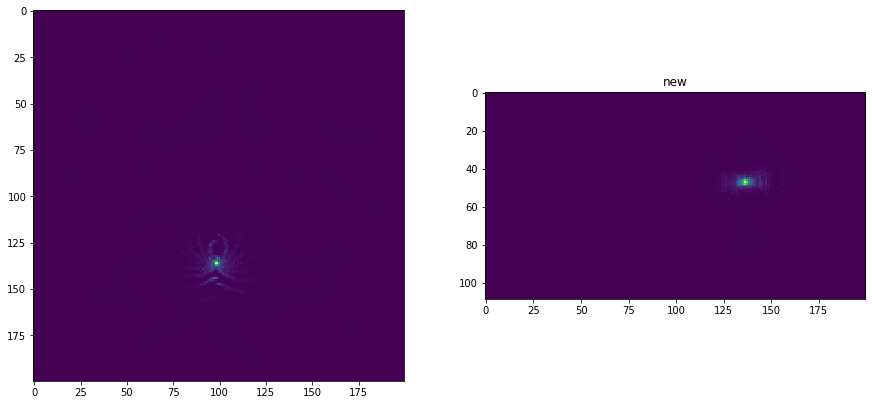

In [104]:
importlib.reload(kex_headers)
importlib.reload(representation)
N = 10000
d = dictionaries[0]
verbose = True
img_bins = representation.get_image_bins(d['tof_lor'][:, d['is_prompt']][:,:N])
img_bins2 = representation.get_img_bins2(d['tof_lor'][:, d['is_prompt']][:,:N], verbose=verbose)
ibins = {'old': img_bins, 'new': img_bins2}

histo = {}
for k in ibins:
    shape = kex_headers.IMAGE_SHAPE
    is_fov = listmode.is_fov(ibins[k], shape)
    histo[k] = (listmode.get_histogram(ibins[k][:, is_fov], shape))
    
for key in histo:
    h = histo[key]
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.imshow(np.sum(h, axis=0))
    plt.subplot(222)
    plt.imshow(np.sum(h, axis=2))
    plt.title(key)
    
    plt.show()

In [ ]:
# test transformation
N = 10000
d = dictionaries[0]
verbose = True
img_bins = representation.get_image_bins(d['tof_lor'][:, d['is_prompt']][:,:N])
img_bins2 = representation.get_img_bins2(d['tof_lor'][:, d['is_prompt']][:,:N], verbose=verbose)
ibins = {'old': img_bins, 'new': img_bins2}


In [58]:
kex_headers.IMAGE_SHAPE

(109, 200, 200)

In [ ]:
diff = histo[1]-histo[0]

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(diff[:,:,100])

In [ ]:
print(np.sum(diff))

In [ ]:
np.nonzero(diff)

In [ ]:
list_diff = ibins[1] - ibins[0]

In [ ]:
print(np.sum(list_diff))

In [ ]:
for k in range(10):
    print(k, ibins[1][:,k], "\n", ibins[0][:,k])